<a href="https://www.kaggle.com/code/ssalijoshua/eda-code?scriptVersionId=221405179" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [100]:
import pandas as pd
import numpy as np
import scipy.io
import h5py
import matplotlib.pyplot as plt

### Examining the structures inside the EEG_full

In [101]:
# Load the .mat file
file_path = "/kaggle/input/arousal/S01_F_CL_Sil_50_100.mat"  # Update with correct path
mat_data = h5py.File(file_path, 'r')

# Check if 'actualVariable' exists
if 'actualVariable' in mat_data:
    actual_var = mat_data['actualVariable']
    print("Keys inside actualVariable:", list(actual_var.keys()))
    
    # Check if 'EEG_full' exists inside 'actualVariable'
    if 'EEG_full' in actual_var:
        eeg_full = actual_var['EEG_full']
        print("Keys inside EEG_full:", list(eeg_full.keys()))
    else:
        print("'EEG_full' not found inside 'actualVariable'")
else:
    print("'actualVariable' not found in the dataset")


Keys inside actualVariable: ['EEG_full']
Keys inside EEG_full: ['chaninfo', 'chanlocs', 'comments', 'condition', 'data', 'dipfit', 'epoch', 'epochdescription', 'etc', 'event', 'eventdescription', 'filename', 'filepath', 'group', 'history', 'icaact', 'icachansind', 'icasphere', 'icasplinefile', 'icaweights', 'icawinv', 'nbchan', 'pnts', 'ref', 'reject', 'saved', 'session', 'setname', 'specdata', 'specicaact', 'splinefile', 'srate', 'stats', 'subject', 'times', 'trials', 'urchanlocs', 'urevent', 'xmax', 'xmin']


### Examining the chaninfo

In [102]:
if 'chaninfo' in eeg_full:
    eeg_data = eeg_full['chaninfo']
    print("Keys inside chaninfo:", list(eeg_data.keys()))
else:
    print("'data' not found inside 'EEG_full'")


Keys inside chaninfo: ['filecontent', 'filename', 'icachansind', 'nodatchans', 'nosedir', 'plotrad', 'shrink']


### Examining chanlocs

In [103]:
if 'chanlocs' in eeg_full:
    eeg_data = eeg_full['chanlocs']
    print("Keys inside chanlocs:", list(eeg_data.keys()))
else:
    print("'data' not found inside 'EEG_full'")


Keys inside chanlocs: ['X', 'Y', 'Z', 'labels', 'radius', 'ref', 'sph_phi', 'sph_radius', 'sph_theta', 'theta', 'type', 'urchan']


### Combining the chanlocs

In [104]:
# Extract channel labels
channel_labels = []
for ref in chanlocs['labels']:
    obj = mat_data[ref[0]]  # Dereference
    label = ''.join(map(chr, obj[:].flatten()))  # Convert to string
    channel_labels.append(label)

def extract_data(ref_array):
    """Extracts numeric data from HDF5 references, ensuring uniform shape."""
    values = []
    
    for ref in ref_array:
        obj = mat_data[ref[0]]  # Dereference
        
        data = obj[()]  # Extract value(s)
        if isinstance(data, np.ndarray):  
            data = data.flatten()  # Ensure it's 1D
            if data.size == 1:
                values.append(data[0])  # Append single value
            else:
                values.append(list(data))  # Append list if multiple values
        else:
            values.append(data)  # Append scalar directly
    
    return values  # Return list instead of NumPy array

# Convert fields into lists of numerical values
df_chanlocs = pd.DataFrame({
    "Channel": channel_labels,
    "X": extract_data(chanlocs['X']),
    "Y": extract_data(chanlocs['Y']),
    "Z": extract_data(chanlocs['Z']),
    "Theta": extract_data(chanlocs['theta']),
    "Sph_Phi": extract_data(chanlocs['sph_phi']),
    "Sph_Theta": extract_data(chanlocs['sph_theta']),
    "Sph_Radius": extract_data(chanlocs['sph_radius'])
})

# Display the cleaned DataFrame
df_chanlocs

,Channel,X,Y,Z,Theta,Sph_Phi,Sph_Theta,Sph_Radius
0,Fp1,0.950477,0.308829,-0.034899,-18.0,-2.0,18.0,1.0
1,AF7,0.787531,0.615286,-0.034899,-38.0,-2.0,38.0,1.0
2,AF3,0.884846,0.375595,0.275637,-23.0,16.0,23.0,1.0
3,F1,0.710264,0.286965,0.642788,-22.0,40.0,22.0,1.0
4,F3,0.673028,0.545007,0.5,-39.0,30.0,39.0,1.0
...,...,...,...,...,...,...,...,...
139,Flight-time,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
140,Course-type,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
141,FB-type,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
142,Ring-type,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"


### Obtaining the data

In [105]:
if 'data' in eeg_full:
    eeg_data = eeg_full['data']
    print("EEG Data Shape:", eeg_data.shape)
else:
    print("'data' not found inside 'EEG_full'")


EEG Data Shape: (441421, 144)


### Converting the data to a pandas dataframe

In [106]:

# Assign column names
df_eeg.columns = ["Timepoint"] + channel_names

# Display the first few rows
df_eeg.head()

,Timepoint,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,Head-raw-z,Head-x,Head-y,Head-z,Condition,Flight-time,Course-type,FB-type,Ring-type,LSL-time
0,Timepoint_1,-9.667615,-10.393621,-9.753345,-9.108747,-8.974578,-5.925375,-7.861744,-1.698606,-3.943043,...,0.956769,360.608093,356.855194,360.956757,6.2,62466.0,1.0,2.0,1.0,21898.416016
1,Timepoint_2,-6.141129,-6.836845,-4.873523,-4.312459,-3.933507,-3.081656,-3.486265,1.742102,-0.792778,...,0.956769,360.608093,356.855194,360.956757,6.2,62466.0,1.0,2.0,1.0,21898.419922
2,Timepoint_3,-4.675134,-4.363692,-0.448084,0.772359,0.550915,0.214158,-2.643757,-0.211528,1.913509,...,0.957018,360.609161,356.857086,360.956879,6.2,62466.0,1.0,2.0,1.0,21898.423828
3,Timepoint_4,-6.067291,-3.423522,-0.172872,1.712570,1.301004,1.842866,-5.526480,-4.801501,1.971172,...,0.957268,360.611298,356.860901,360.957153,6.2,62466.0,1.0,2.0,1.0,21898.427734
4,Timepoint_5,-9.710501,-6.376214,-4.447028,-1.877157,-2.537558,-1.611499,-7.792553,-6.148304,-1.637977,...,0.957517,360.613464,356.864685,360.957397,6.2,62466.0,1.0,2.0,1.0,21898.431641


In [107]:
 df_eeg.describe()

,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,FC3,...,Head-raw-z,Head-x,Head-y,Head-z,Condition,Flight-time,Course-type,FB-type,Ring-type,LSL-time
count,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,...,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000,441421.000000
mean,-0.002238,0.006330,0.003392,0.005507,0.004104,0.005300,0.005868,0.007211,0.005776,0.005665,...,31.998072,361.190216,359.009064,361.075562,6.333631,68429.859375,1.452199,1.979713,2.241439,23613.615234
std,11.603650,9.732660,8.572510,7.614831,7.464170,7.279812,7.652548,7.821293,6.643475,6.063098,...,100.427605,5.215191,1.115968,1.029030,0.193339,12957.909180,0.496702,0.829074,4.050922,891.589539
min,-87.769409,-97.138115,-48.156540,-47.762119,-47.085369,-73.024338,-99.737900,-116.496704,-79.257004,-49.936390,...,-0.005709,315.225281,254.571030,263.341858,6.100000,34116.000000,1.000000,1.000000,1.000000,21898.416016
25%,-6.629619,-5.994308,-5.475246,-4.988505,-4.873827,-4.759687,-4.977228,-5.065335,-4.375896,-3.987508,...,0.686483,357.974762,358.350830,360.492188,6.200000,60062.000000,1.000000,1.000000,1.000000,22913.832031
50%,-0.679417,-0.370724,-0.235311,-0.044940,-0.076122,-0.070265,-0.032325,0.076122,-0.026245,-0.019628,...,1.200182,360.837067,359.042664,361.004456,6.300000,66317.000000,1.000000,2.000000,2.000000,23650.433594
75%,5.278647,5.330760,5.037460,4.866441,4.703454,4.628930,4.928057,5.145724,4.326827,3.936315,...,1.904484,364.192261,359.660370,361.606842,6.500000,84451.000000,2.000000,3.000000,2.000000,24365.417969
max,114.613678,93.120361,67.006897,53.871586,57.465363,57.192097,63.829643,93.060867,54.276924,54.904232,...,359.994110,388.409241,363.153839,364.047028,6.600000,86430.000000,2.000000,3.000000,108.000000,25092.494141


In [108]:
# Check for NaN or infinite values
print("Missing values:", np.isnan(eeg_data).sum())
print("Infinite values:", np.isinf(eeg_data).sum())


Missing values: 3026024
Infinite values: 0


### Sampling rate

In [109]:

sampling_rate = mat_data['actualVariable']['EEG_full']['srate'][()]
print("Sampling Rate:", sampling_rate)


Sampling Rate: [[256.]]


### One EEG channel over time

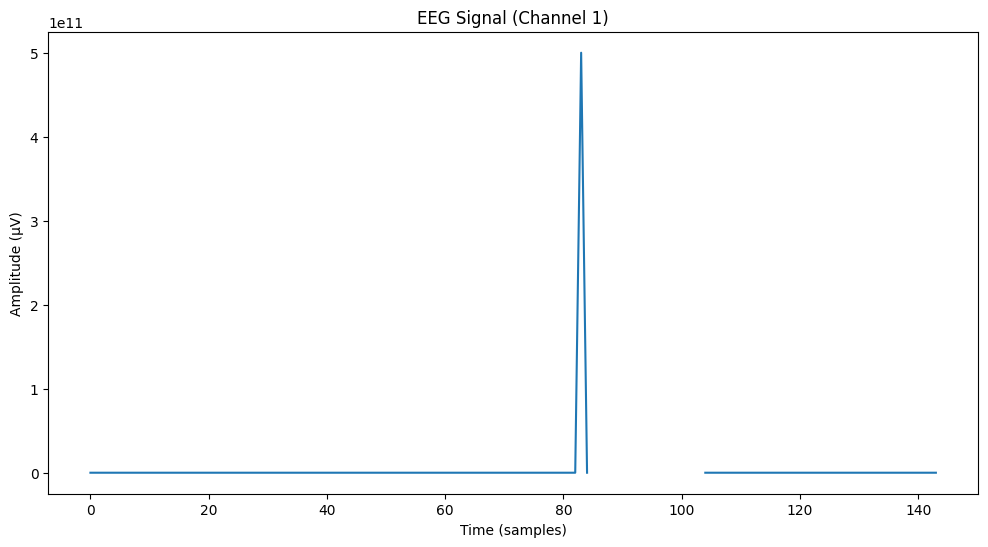

In [110]:
# Select first channel and first 1000 time points
plt.figure(figsize=(12,6))
plt.plot(eeg_data[0, :1000])
plt.title("EEG Signal (Channel 1)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (µV)")
plt.show()


<ipython-input-111-f0854476fc6a>:5: UserWarning: nperseg = 256 is greater than input length  = 144, using nperseg = 144
  frequencies, times, Sxx = sp.spectrogram(eeg_data[0], fs=256)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


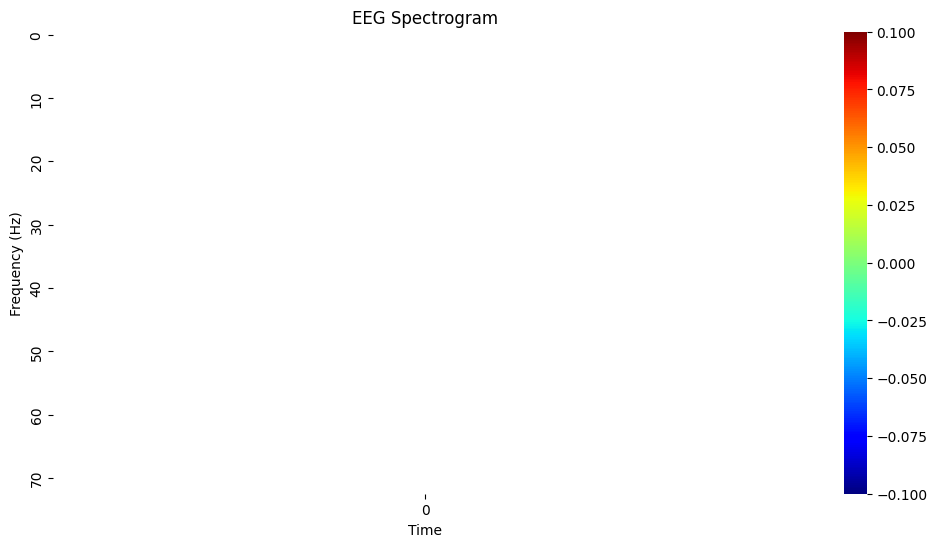

In [111]:
import seaborn as sns
import scipy.signal as sp

# Compute spectrogram
frequencies, times, Sxx = sp.spectrogram(eeg_data[0], fs=256)

# Plot spectrogram
plt.figure(figsize=(12,6))
sns.heatmap(Sxx, cmap="jet", xticklabels=50, yticklabels=10)
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
plt.title("EEG Spectrogram")
plt.show()
